In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [47]:
data=pd.read_csv('chd.csv')

In [48]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [49]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Data-Preprocessing

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
Le=LabelEncoder()

In [53]:
data['education'].describe()

count    4135.000000
mean        1.979444
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [54]:
data['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [55]:
# Replacivng the nan column with median of values
data['education']=Le.fit_transform(data['education'])

In [56]:
data['education'].unique()

array([  3,   1,   0,   2,  29,  26,  41,  40,  91,  86,  89,  90,  92,
       102, 105,  73,  50,  54,  55,  69,  67,  66,  62,  52,  46,  97,
       107,  85,  84,  77,  16,  32,  25,  21,  22,  31,  10,  17,  34,
        39,   9,   8,  11,  38,  35,  37,  15,  78,  96,  98, 100, 104,
        76,  74,  47,  58,  60,  63,  64,  70,  71,  61,  59,  56,  49,
        75, 101,  99,  95,  88,  82,  80,  79,  43,  36,  33,  24,  23,
        20,  18,   7,   4,   6, 108,  12,  19,  30,   5,  81,  83,  65,
        68,  72,  57,  53,  51,  45, 103,  13,  14,  27,  28,  44,  42,
        48, 106,  94,  93,  87], dtype=int64)

In [57]:
data['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [58]:
data['cigsPerDay'].describe()

count    4211.000000
mean        9.005937
std        11.922462
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [59]:
# Replacivng the nan column with median of values
data['cigsPerDay']=Le.fit_transform(data['cigsPerDay'])

In [60]:
data['cigsPerDay'].unique()

array([ 0, 20, 24, 21, 15,  9, 10,  5, 25, 28,  1, 27,  3,  2, 57, 35, 12,
        4, 18, 22, 31, 14, 29,  8, 30, 13, 11,  7,  6, 48, 52, 26, 40, 51,
       36, 23, 42, 41, 17, 46, 54, 49, 59, 16, 34, 39, 19, 32, 56, 47, 45,
       33, 60, 38, 50, 53, 58, 44, 61, 55, 37, 43], dtype=int64)

In [61]:
data['BPMeds'].unique()

array([ 0.,  1., nan])

In [62]:
data['BPMeds'].median()

0.0

In [63]:
# Replacivng the nan column with median of values
data['BPMeds']=Le.fit_transform(data['BPMeds'])

In [64]:
data['totChol'].unique()

array([195., 250., 245., 225., 285., 228., 205., 313., 260., 254., 247.,
       294., 332., 226., 221., 232., 291., 190., 185., 234., 215., 270.,
       272., 295., 209., 175., 214., 257., 178., 233., 180., 243., 237.,
        nan, 311., 208., 252., 261., 179., 194., 267., 216., 240., 266.,
       255., 220., 235., 212., 223., 300., 302., 248., 200., 189., 258.,
       202., 213., 183., 274., 170., 210., 197., 326., 188., 256., 244.,
       193., 239., 296., 269., 275., 268., 265., 173., 273., 290., 278.,
       264., 282., 241., 288., 222., 303., 246., 150., 187., 286., 154.,
       279., 293., 259., 219., 230., 320., 312., 165., 159., 174., 242.,
       301., 167., 308., 325., 229., 236., 224., 253., 464., 171., 186.,
       227., 249., 176., 163., 191., 263., 196., 310., 164., 135., 238.,
       207., 342., 287., 182., 352., 284., 217., 203., 262., 129., 155.,
       323., 206., 283., 319., 304., 340., 328., 280., 368., 218., 276.,
       339., 231., 198., 177., 201., 277., 184., 19

In [65]:
# Replacivng the nan column with median of values
data['totChol']=Le.fit_transform(data['totChol'])

In [66]:
data['BMI'].unique()

array([26.97, 28.73, 25.34, ..., 26.7 , 43.67, 20.91])

In [67]:
round(data['BMI'].mean(),0)

26.0

In [68]:
# Replacivng the nan column with median of values
data['BMI']=Le.fit_transform(data['BMI'])

In [69]:
data['heartRate'].unique()

array([ 80.,  95.,  75.,  65.,  85.,  77.,  60.,  79.,  76.,  93.,  72.,
        98.,  64.,  70.,  71.,  62.,  73.,  90.,  96.,  68.,  63.,  88.,
        78.,  83., 100.,  67.,  84.,  57.,  50.,  74.,  86.,  55.,  92.,
        66.,  87., 110.,  81.,  56.,  89.,  82.,  48., 105.,  61.,  54.,
        69.,  52.,  94., 140., 130.,  58., 108., 104.,  91.,  53.,  nan,
       106.,  59.,  51., 102., 107., 112., 125., 103.,  44.,  47.,  45.,
        97., 122., 120.,  99., 115., 143., 101.,  46.])

In [70]:
round(data['heartRate'].mean(),0)

76.0

In [71]:
# Replacivng the nan column with median of values
data['heartRate']=Le.fit_transform(data['heartRate'])

In [72]:
data['glucose'].unique()

array([ 77.,  76.,  70., 103.,  85.,  99.,  78.,  79.,  88.,  61.,  64.,
        84.,  nan,  72.,  89.,  65., 113.,  75.,  83.,  66.,  74.,  63.,
        87., 225.,  90.,  80., 100., 215.,  98.,  62.,  95.,  94.,  55.,
        82.,  93.,  73.,  45., 202.,  68.,  97., 104.,  96., 126., 120.,
       105.,  71.,  56.,  60., 117., 102.,  58.,  92., 109.,  86., 107.,
        54.,  67.,  69.,  57.,  91., 132., 150.,  59.,  81., 115., 140.,
       112., 118., 143., 114., 160., 110., 123., 108., 145., 122., 137.,
       106., 127., 205., 130., 101.,  47.,  53., 216., 163., 144., 116.,
       121., 172., 124., 111.,  40., 186., 223., 325.,  44., 156., 268.,
        50., 274., 292., 255., 136., 206., 131., 148., 297.,  43., 173.,
        48., 386., 155., 147., 170.,  52., 320., 254., 394., 270., 244.,
       183., 142., 119., 135., 167., 207., 129., 177., 250., 294., 166.,
       125., 332., 368., 348., 248., 370., 193., 191., 256., 235., 210.,
       260.])

In [73]:
round(data['glucose'].mean(),0)

82.0

In [74]:
# Replacivng the nan column with median of values
data['glucose']=Le.fit_transform(data['glucose'])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null int64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null int64
BPMeds             4240 non-null int64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null int64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null int64
heartRate          4240 non-null int64
glucose            4240 non-null int64
TenYearCHD         4240 non-null int64
dtypes: float64(2), int64(14)
memory usage: 530.1 KB


In [76]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [77]:
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.027478,0.197026,0.293369,-0.046591,-0.004550,0.005853,0.015693,-0.091655,-0.035879,0.058199,0.112169,-0.115553,-0.073529,0.088374
age,-0.029014,1.000000,-0.002419,-0.213662,-0.197056,0.052726,0.057679,0.306799,0.101314,0.256588,0.394053,0.205586,0.140962,-0.012453,0.003438,0.225408
education,0.027478,-0.002419,1.000000,0.004052,0.011606,-0.013387,-0.014256,-0.011257,-0.008824,-0.009981,-0.017355,0.003028,0.026772,-0.027917,-0.010561,0.000118
currentSmoker,0.197026,-0.213662,0.004052,1.000000,0.818153,-0.021722,-0.032980,-0.103710,-0.044285,-0.034300,-0.130281,-0.107933,-0.173763,0.065809,0.011883,0.019448
cigsPerDay,0.293369,-0.197056,0.011606,0.818153,1.000000,-0.019699,-0.032533,-0.083484,-0.038050,-0.018319,-0.099863,-0.069638,-0.117987,0.080362,0.000121,0.043111
BPMeds,-0.046591,0.052726,-0.013387,-0.021722,-0.019699,1.000000,0.007390,0.036101,0.016225,0.014783,0.040330,0.026905,-0.005533,0.004733,-0.017797,0.023458
prevalentStroke,-0.004550,0.057679,-0.014256,-0.032980,-0.032533,0.007390,1.000000,0.074791,0.006955,-0.000923,0.057000,0.045153,0.025354,-0.017671,-0.012393,0.061823
prevalentHyp,0.005853,0.306799,-0.011257,-0.103710,-0.083484,0.036101,0.074791,1.000000,0.077752,0.147036,0.696656,0.615840,0.292129,0.147978,0.000561,0.177458
diabetes,0.015693,0.101314,-0.008824,-0.044285,-0.038050,0.016225,0.006955,0.077752,1.000000,0.028998,0.111265,0.050260,0.081077,0.049459,0.062889,0.097344
totChol,-0.091655,0.256588,-0.009981,-0.034300,-0.018319,0.014783,-0.000923,0.147036,0.028998,1.000000,0.196989,0.153564,0.126514,0.089632,0.089750,0.076507


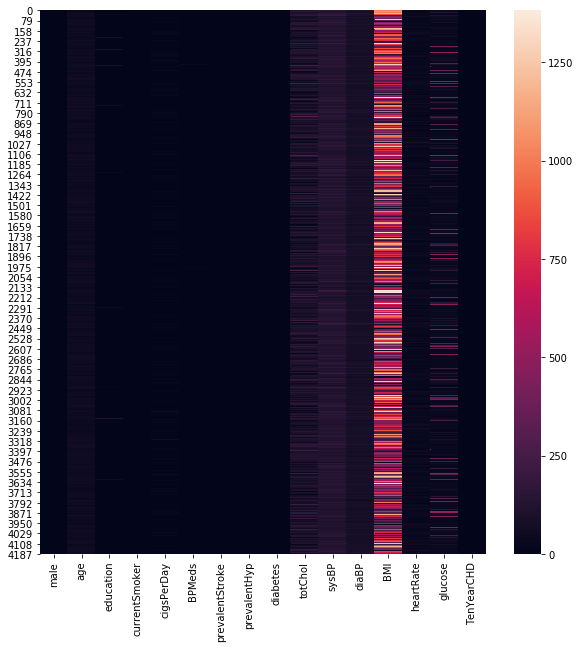

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(data)

- This Dataset is related to heart disease.
- Target Column - Ten Year CHD
- Using the independent features predict whether a person gets the disease or not.
- Apply SVM and also all the discussed models as of now.
- Apply analysis and preprocessing of the data.

In [79]:
data.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [80]:
# Extracting Feature and target
X=data.drop(columns=['TenYearCHD'])
y=data['TenYearCHD']

In [81]:
X.shape,y.shape

((4240, 15), (4240,))

In [82]:
from imblearn.over_sampling import SMOTE

In [84]:
x_resample,y_resample=SMOTE(k_neighbors=5).fit_resample(X,y)

In [85]:
pd.Series(y_resample).value_counts()

1    3596
0    3596
Name: TenYearCHD, dtype: int64

# split the dataset into train and test 20%

In [87]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.20,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5753, 15), (1439, 15), (5753,), (1439,))

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [89]:
Lor=LogisticRegression()

In [90]:
Lor.fit(X_train,y_train)

LogisticRegression()

In [91]:
y_pred_train=Lor.predict(X_train)
y_pred_test=Lor.predict(X_test)

In [92]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))


0.6420997740309404
0.6275191104933981


### ROC and AUC for Training data


In [93]:
from sklearn.metrics import roc_curve,auc

In [94]:
y_pred_train_prob=Lor.predict_proba(X_train)
y_pred_train_prob_1=y_pred_train_prob[:,1]

In [95]:
fpr,tpr,thresh=roc_curve(y_train,y_pred_train_prob_1)

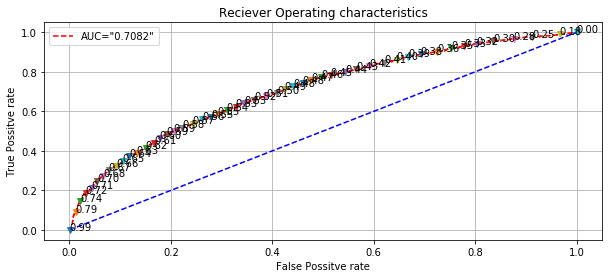

In [96]:
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresh)):
    if i%50==1:
        plt.plot(fpr[i],tpr[i],'v')
        plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Reciever Operating characteristics')
area=auc(fpr,tpr)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

# Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [99]:
RFC=RandomForestClassifier()

In [100]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
y_pred_train=RFC.predict(X_train)
y_pred_test=RFC.predict(X_test)

In [102]:
print('-- Accuracy Score --')
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

-- Accuracy Score --
1.0
0.8637943015983321


In [103]:
print('-- ROC_AUC Score --')
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred_test))

-- ROC_AUC Score --
1.0
0.8641487213997308


### ROC and AUC for Training data


In [104]:
from sklearn.metrics import roc_curve,auc

In [105]:
y_pred_train_prob=RFC.predict_proba(X_train)
y_pred_train_prob_1=y_pred_train_prob[:,1]

In [106]:
fpr,tpr,thresh=roc_curve(y_train,y_pred_train_prob_1)

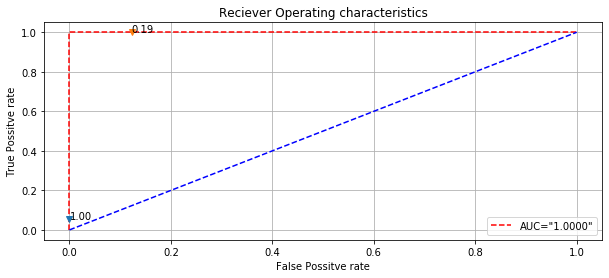

In [107]:
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr,'r--')
plt.plot([0,1],[0,1],'b--')
for i in range(len(thresh)):
    if i%50==1:
        plt.plot(fpr[i],tpr[i],'v')
        plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
        
plt.xlabel('False Possitve rate')
plt.ylabel('True Possitve rate')
plt.title('Reciever Operating characteristics')
area=auc(fpr,tpr)
plt.legend(['AUC="%0.4f"'%area])
plt.grid()
plt.show()

# Support Vector Machine Classifier

In [108]:
from sklearn.svm import SVC

In [109]:
svc=SVC()

In [110]:
svc.fit(X_train,y_train)

SVC()

In [111]:
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(X_test)

In [112]:
print('-- Accuracy Score --')
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

-- Accuracy Score --
0.6226316704328176
0.5983321751216122


In [113]:
print('-- ROC_AUC_SCORE --')
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))

-- ROC_AUC_SCORE --
0.6221619710649409
0.599857288717687


# KNN 

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn=KNeighborsClassifier()

In [116]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [117]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)

In [118]:
print('-- Accuracy Score --')
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

-- Accuracy Score --
0.8638970971666956
0.8088950660180682


In [119]:
print('-- ROC_AUC Score --')
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))

-- ROC_AUC Score --
0.8648324208032683
0.8039421574542474


# Gradient Boosting classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
GRB=GradientBoostingClassifier()

In [122]:
GRB.fit(X_train,y_train)

GradientBoostingClassifier()

In [123]:
y_train_pred=GRB.predict(X_train)
y_test_pred=GRB.predict(X_test)

In [124]:
print('-- Accuracy Score --')
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

-- Accuracy Score --
0.8098383452111941
0.7658095899930507


In [125]:
print('-- ROC_AUC Score --')
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))

-- ROC_AUC Score --
0.8097035183775095
0.767036401045776


# Naivye Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB

In [127]:
GN=GaussianNB()

In [128]:
GN.fit(X_train,y_train)

GaussianNB()

In [129]:
y_train_pred=GN.predict(X_train)
y_test_pred=GN.predict(X_test)

In [130]:
print('-- Accuracy Score --')
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

-- Accuracy Score --
0.645402398748479
0.6386379430159833


In [131]:
print('-- ROC_AUC Score --')
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))

-- ROC_AUC Score --
0.6454412173513664
0.6383883680636129
